## Denoising Autoencoders

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Input, Conv2DTranspose

## Loading the dataset

In [15]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Adding extra dimension i.e channel to the dataset
x_train = x_train[..., tf.newaxis].astype('float32') / 255.
x_test = x_test[..., tf.newaxis].astype('float32') / 255.

x_train.shape

(60000, 28, 28, 1)

## Adding Noise to the dataset

In [16]:
noise_percentage = 0.22

x_train_noise = x_train + tf.random.normal(shape=x_train.shape) * noise_percentage
x_test_noise = x_test + tf.random.normal(shape=x_test.shape) * noise_percentage

# Normalizing the pixel values between 0 to 1

x_train_noise = tf.clip_by_value(x_train_noise, clip_value_min=0., clip_value_max=1.)
x_test_noise = tf.clip_by_value(x_test_noise, clip_value_min=0., clip_value_max=1.)

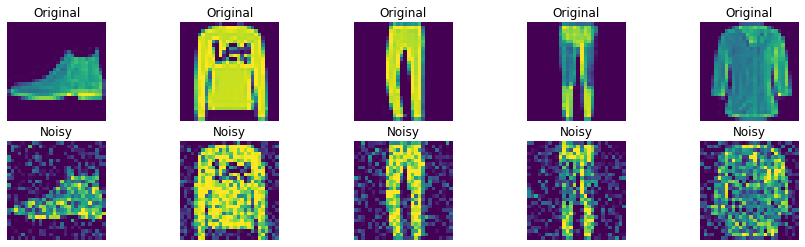

In [17]:

plt.figure(figsize=(15, 4))
# Original Image
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(tf.squeeze(x_test[i]))
    plt.title('Original')
    plt.axis('off')

# Noisy Images
for i in range(5):
    plt.subplot(2, 5, i+5+1)
    plt.imshow(tf.squeeze(x_test_noise[i]))
    plt.title('Noisy')
    plt.axis('off')
plt.show()

## Denoising Autoencoder

In [18]:

class Denoising_Autoencoder(tf.keras.Model):

    def __init__(self):
        super(Denoising_Autoencoder, self).__init__()

        self.Encoder = tf.keras.Sequential([
                       Input(shape=(28, 28, 1)),
                       Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
                       Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)

        ])


        # in decoder we will use Transposed convolution / Deconvolution layers for upsampling
        self.Decoder = tf.keras.Sequential([
                       Conv2DTranspose(8, (3, 3), activation='relu', padding='same', strides=2),
                       Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2),
                       Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
        ])

    def call(self, Input):
        encoded = self.Encoder(Input)
        decoded = self.Decoder(encoded)

        return decoded

denoising_autoencoder = Denoising_Autoencoder() 


In [22]:
denoising_autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

## Training the model

In [23]:
trained = denoising_autoencoder.fit(x_train_noise, x_train, 
                                    epochs=10,
                                    shuffle=True, 
                                    validation_data=(x_test_noise, x_test)
)

Epoch 1/10
1875/1875 [==============================] - 84s 29ms/step - loss: 0.0178 - val_loss: 0.0097
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0091 - val_loss: 0.0088
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 8/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0075 - val_loss: 0.0076
Epoch 9/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 10/10
1875/1875 [==============================] - 54s 29m

In [24]:
## Encoder
denoising_autoencoder.Encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [25]:
## Decoder
denoising_autoencoder.Decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


## Testing & Results

In [26]:
encoded = denoising_autoencoder.Encoder(x_test).numpy()
decoded = denoising_autoencoder.Decoder(encoded).numpy()

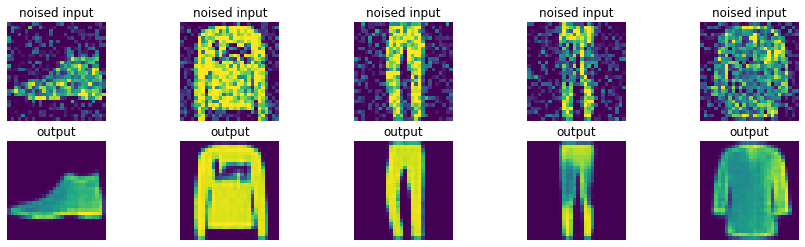

In [27]:
plt.figure(figsize=(15, 4))

for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(tf.squeeze(x_test_noise[i]))
    plt.title('noised input')
    plt.axis('off')

for i in range(5):
    plt.subplot(2, 5, i+5+1)
    plt.imshow(tf.squeeze(decoded[i]))
    plt.title('denoised')
    plt.axis('off')
